In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# start with basic decision tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
# data preparation for standard tree - don't use categorical
categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
numerical_features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]
target = ['stroke']

In [ ]:
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])
df.isna().value_counts()
# a few null values, around 200 for bmi out of 5k.  Delete for now, or couldreplace with avg bmi, maybe average bmi?  more of the positive examples seem to be having missing bmi... 
df = df.dropna()

In [37]:
X, y = df[categorical_features + numerical_features], df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

Accuracy: 0.9276985743380856


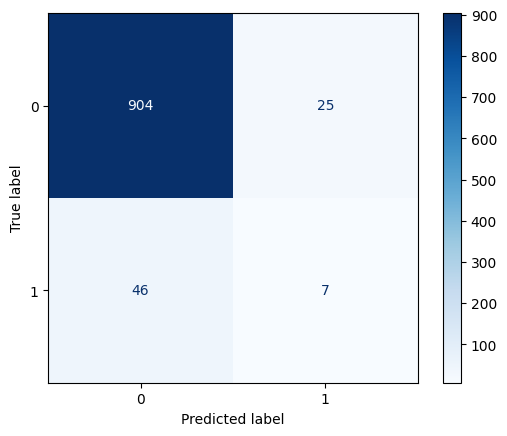

In [57]:
# really basic decision tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.show()

Accuracy: 0.7678207739307535


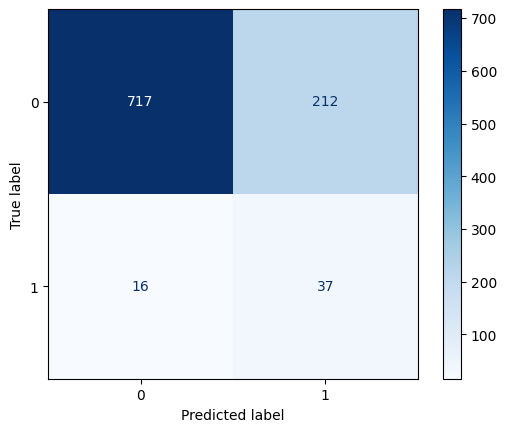

In [71]:
# add some parameters
clf = tree.DecisionTreeClassifier(class_weight = 'balanced', max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.show()

/home/devcontainers/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9460285132382892


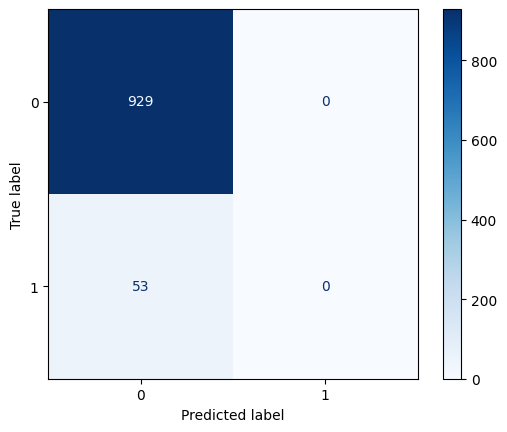

In [75]:
# standard decision tree isn't doing so hot, let's try a random forest! 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
clf = RandomForestClassifier(oob_score=f1_score)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [82]:
# some key takeaways - biased dataset is dangeroussss
from sklearn.utils import resample

# Combine X and y for convenience
train = pd.concat([X_train, y_train], axis=1)

# Split by class
majority = train[train.stroke == 0]
minority = train[train.stroke == 1]

# Downsample majority to match minority
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

# Combine and shuffle
downsampled = pd.concat([majority_downsampled, minority]).sample(frac=1, random_state=42)

# Split back into X and y
X_train_down = downsampled.drop(columns='stroke')
y_train_down = downsampled['stroke']


Accuracy: 0.6720977596741344


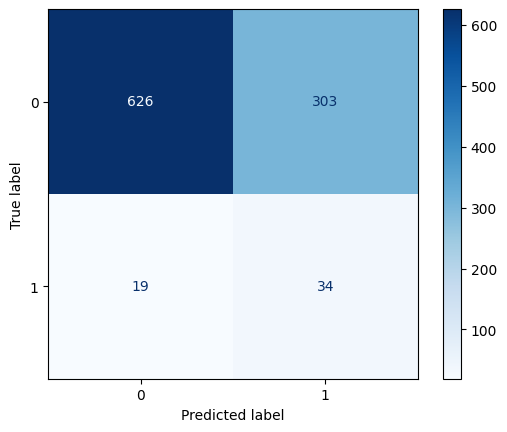

In [88]:
# really basic decision tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_down, y_train_down)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.show()

Accuracy: 0.6364562118126272


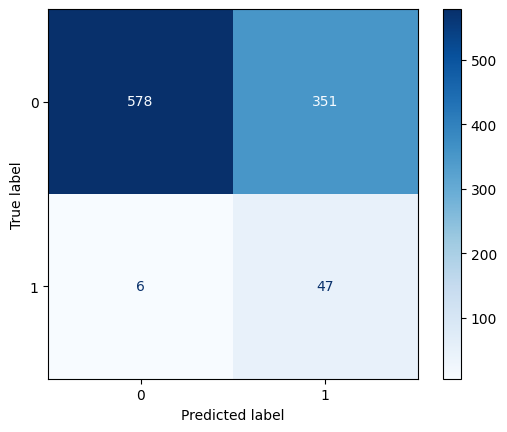

In [87]:
# add some parameters
clf = tree.DecisionTreeClassifier(class_weight = 'balanced', max_depth=4)
clf.fit(X_train_down, y_train_down)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.show()

Accuracy: 0.6965376782077393


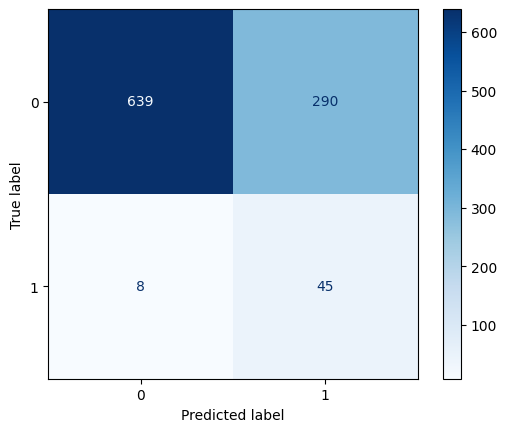

In [93]:
# standard decision tree isn't doing so hot, let's try a random forest! 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
clf = RandomForestClassifier(class_weight='balanced', n_estimators=50)
clf.fit(X_train_down, y_train_down)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# time to try LightGBM
